### Regression
- 변수들 간의 상관관계를 찾는 것, 연속적인 데이터로부터 결과를 예측
- 예측 결과가 숫자일 때
- ex. 근속연수에 따른 임금, 키에 따른 몸무게, 사용 기간에 따른 스마트폰 가격
- Independent variable 독립변수(원인) = 입력변수, feature
- Dependent variable 종속변수(결과) = 출력 변수, target, label

### 1. Lenear Regression(선형 회귀)
- 실제 값과 예측 값 차이의 제곱의 합을 최소화
- y = mx + b 
- m : 기울기 / b : y절편


[ 공부 시간에 따른 시험 점수 ]

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [5]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [6]:
X = dataset.iloc[:, :-1].values # 처음부터 마지막 컬럼 직전까지의 데이터 (독립변수)
y = dataset.iloc[:, -1].values  # 마지막 컬럼 데이터(종속 변수 - 결과)

In [7]:
X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()  # 객체 생성
reg.fit(X,y)  # 학습 (모델 생성)

LinearRegression()

In [9]:
y_pred = reg.predict(X)   # X에 대한 예측값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

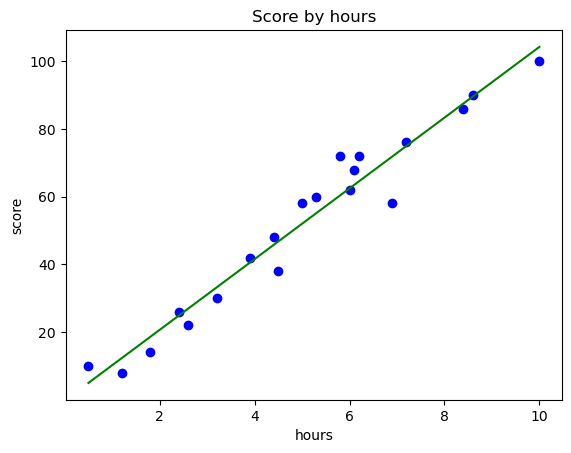

In [10]:
plt.scatter(X,y, color='blue')
plt.plot(X, y_pred, color='green')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [13]:
print('9시간 공부했을 때 예상 점수 : ', reg.predict([[9]]))   #[9],[8],[7]]

9시간 공부했을 때 예상 점수 :  [93.77478776]


In [14]:
reg.coef_ #기울기(m)

array([10.44369694])

In [15]:
reg.intercept_  #y절편(b)

-0.21848470286721522

y = mx + b  -> y = 10.4436x - 0.2184

### 데이터 세트 분리

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [19]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 훈련 80 : 테스트 20 으로 분리

In [33]:
X, len(X)    # 전체 데이터 X, 개수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [34]:
X_train, len(X_train)  # 훈련세트 X, 개수

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [35]:
X_test, len(X_test)  # 테스트 세트 X, 개수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

### 분리된 데이터를 통한 모델링

In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()


In [37]:
reg.fit(X_train, y_train)    #훈련 세트로 학습

LinearRegression()

#### 데이터 시각화(훈련세트)

Text(0, 0.5, 'score')

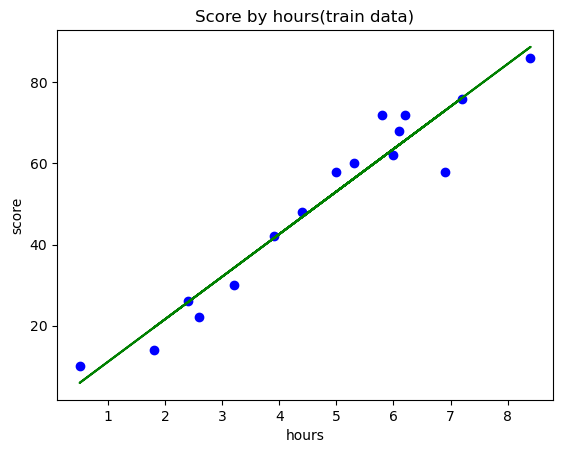

In [38]:
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Score by hours(train data)')
plt.xlabel('hours')
plt.ylabel('score')

#### 데이터 시각화(테스트세트)

Text(0, 0.5, 'score')

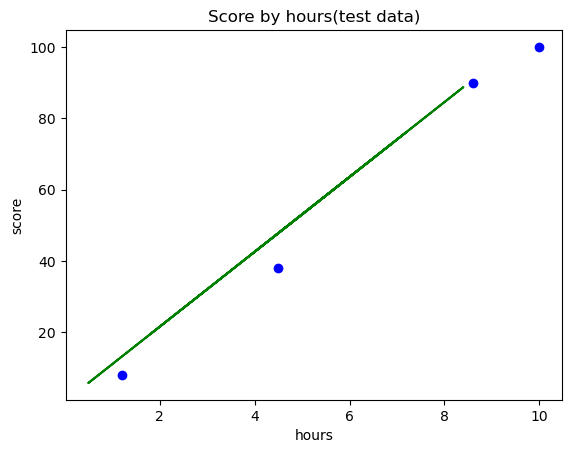

In [39]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Score by hours(test data)')
plt.xlabel('hours')
plt.ylabel('score')

In [40]:
reg.coef_   # 기울기(m)

array([10.49161294])

In [41]:
reg.intercept_    # y 절편(b)

0.6115562905169796

#### 모델 평가

In [43]:
reg.score(X_test, y_test)   # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [44]:
reg.score(X_train, y_train)   # 테스트 세트를 통한 모델 평가

0.9356663661221668

## 경사 하강법(Gradient Descent)

max_iter : 훈련 세트 반복 횟수 (Epoch 횟수)

eta0 : 학습률(learning rate)

In [61]:
from sklearn.linear_model import SGDRegressor    # SGD : Stochastic Gradient Descent 확률적 경사 하강법

# 지수표기법
# 1e-3 : 0.001 (10^-3)
# 1e-4 : 0.0001 (10^-4)
# 1e+3 : 1000 (10^3)
# 1e+4 : 10000 (10^4)


# sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=1)     # 훈련세트반복횟수, 학습률, 랜덤, 훈련세트를 반복하면서 손실을 보여줌
sr = SGDRegressor() 
sr.fit(X_train,y_train)  

SGDRegressor()

Text(0, 0.5, 'score')

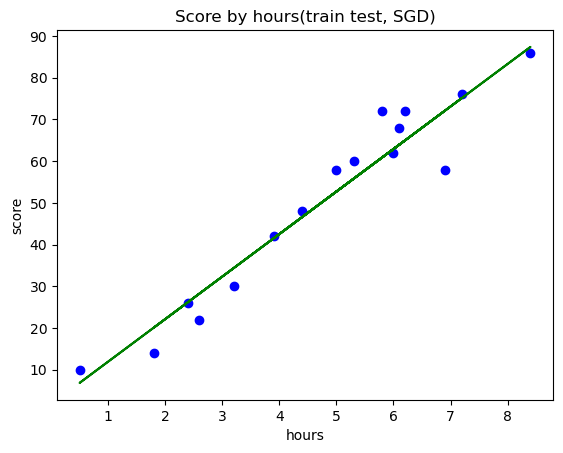

In [62]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, sr.predict(X_train), color='green')
plt.title('Score by hours(train test, SGD)')
plt.xlabel('hours')
plt.ylabel('score')

In [48]:
sr.coef_, sr.intercept_

(array([10.44652009]), array([1.65395386]))

In [49]:
sr.score(X_train, y_train)   # 테스트 세트를 통한 모델 평가

0.9343334656176773

In [50]:
sr.score(X_test, y_test)   # 훈련 세트를 통한 모델 평가

0.9662745662983008